<a href="https://colab.research.google.com/github/jwoo13/Computer1/blob/main/%EC%98%A4%EC%B8%A02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

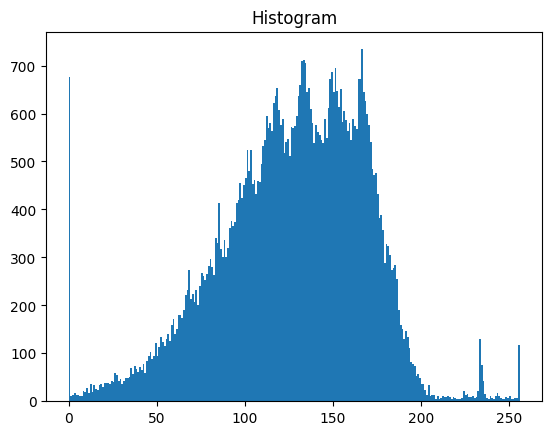

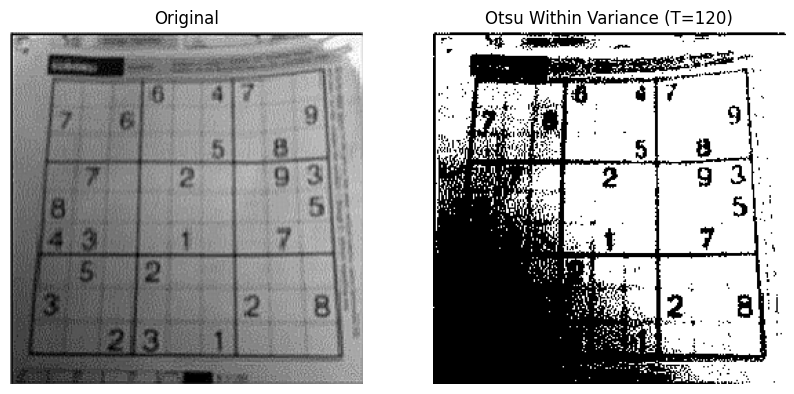

In [5]:
# 1. raw 파일 읽기
width, height = 256, 256
raw = np.fromfile("스도쿠256.raw", dtype=np.uint8)
img = raw.reshape((height, width))  # (세로, 가로)

# 2. 히스토그램 계산
plt.hist(img.ravel(), bins=256, range=(0,256))
plt.title("Histogram")
plt.show()

# 3. Otsu 이진화 (Within Class Variance 기준)
total = img.size
threshold = 0
min_within = np.inf  # 최소 클래스 내 분산

for t in range(256):
    # 배경 클래스
    B = img[img <= t]
    # 전경 클래스
    F = img[img > t]
    if len(B) == 0 or len(F) == 0:
        continue
    wB = len(B) / total
    wF = len(F) / total
    varB = np.var(B)
    varF = np.var(F)

    within_var = wB * varB + wF * varF  # 클래스 내 분산 합
    if within_var < min_within:
        min_within = within_var
        threshold = t

# 임계값 적용
otsu_within = (img > threshold).astype(np.uint8) * 255

# 4. 결과 출력
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(otsu_within, cmap='gray')
plt.title(f"Otsu Within Variance (T={threshold})")
plt.axis("off")

plt.show()